In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import igraph

In [15]:
ariel = pd.read_csv('data_ariel.csv')
banghua = pd.read_csv('data_banghua.csv')

In [16]:
banghua.columns == ariel.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [17]:
# Get the average sleep time for each day
print("ariel average sleep time: ", ariel['How many hours sleep did you get last night?'].mean())
print("banghua average sleep time: ", banghua['How many hours sleep did you get last night?'].mean())

ariel average sleep time:  8.433333333333334
banghua average sleep time:  6.863636363636363


In [8]:
# Get the average sleep time for each day
ariel_hr_day_y = ariel['How many hours sleep did you get last night?']
banghua_hr_day_y = banghua['How many hours sleep did you get last night?']
arile_hr_day_x = list(range(len(ariel_hr_day_y)))
banghua_hr_day_x = list(range(len(banghua_hr_day_y)))

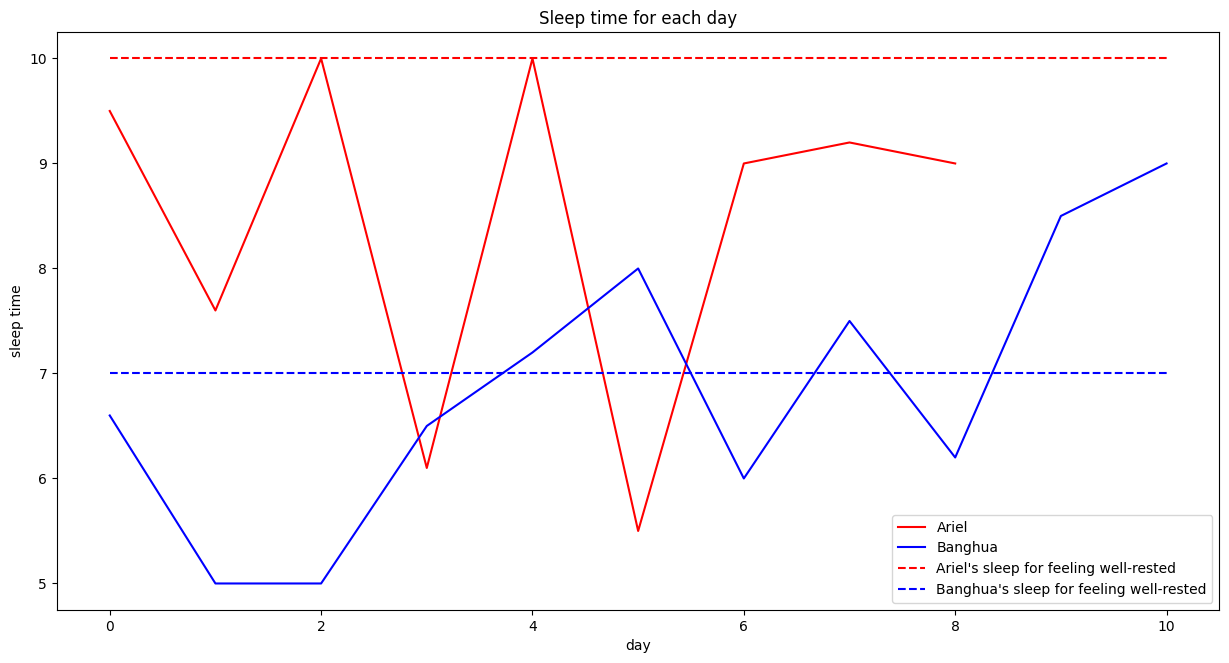

In [9]:
# plot line chart for sleep time
# Set the size of the figure
plt.figure(figsize=(15, 7.5))
plt.plot(arile_hr_day_x, ariel_hr_day_y, label='Ariel', color='red')
plt.plot(banghua_hr_day_x, banghua_hr_day_y, label='Banghua', color='blue')
# Add a line ariel sleep = 10
plt.plot(banghua_hr_day_x, [10]*len(banghua_hr_day_y), label='Ariel\'s sleep for feeling well-rested', color='red', linestyle='dashed')
plt.plot(banghua_hr_day_x, [7]*len(banghua_hr_day_y), label='Banghua\'s sleep for feeling well-rested', color='blue', linestyle='dashed')
plt.xlabel('day')
plt.ylabel('sleep time')
plt.title('Sleep time for each day')
# txt="The sleep time by day for Ariel and Banghua. The average sleep time for Ariel is 8.43 hours, and the average sleep time for Banghua is 6.86 hours."
# plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.legend()
plt.show()

In [19]:
ariel_comparision = pd.DataFrame(columns=['Hours Stopped Working', 'Midterms', 'Hours Sleep', 'Sleep Quality', 'Felt Stressed', 'Emotional Burnout', 'Memory Cards Turns', 'Memory Cards Time', 'Cognitive Burnout'])
banghua_comparison = pd.DataFrame(columns=['Hours Stopped Working', 'Midterms', 'Hours Sleep', 'Sleep Quality', 'Felt Stressed', 'Emotional Burnout', 'Memory Cards Turns', 'Memory Cards Time', 'Cognitive Burnout'])

In [20]:
for i in range(len(ariel)):
    ariel_comparision.loc[i] = [ariel['Before going to sleep last night, for how many hours did you stop working? \nPlease fill in a number:'][i], ariel['Did you have a midterm today?'][i], ariel['How many hours sleep did you get last night?'][i], ariel['How well did you sleep last night?'][i], ariel['How stressed did you feel today?'][i], ariel['Today I felt emotionally drained.'][i] - ariel['I felt happy today.'][i] - ariel['I enjoyed my work today.'][i], ariel['How many card turns did it take you to complete the task?'][i], ariel['How long did it take you to complete the task (seconds)'][i], ariel['Today I felt stressed.'][i] + ariel['I found it difficult to concentrate on my work today.'][i] - ariel['How well did you feel you were able to cope with your stress today?'][i]]
    banghua_comparison.loc[i] = [banghua['Before going to sleep last night, for how many hours did you stop working? \nPlease fill in a number:'][i], banghua['Did you have a midterm today?'][i], banghua['How many hours sleep did you get last night?'][i], banghua['How well did you sleep last night?'][i], banghua['How stressed did you feel today?'][i], banghua['Today I felt emotionally drained.'][i] - banghua['I felt happy today.'][i] - banghua['I enjoyed my work today.'][i], banghua['How many card turns did it take you to complete the task?'][i], banghua['How long did it take you to complete the task (seconds)'][i], banghua['Today I felt stressed.'][i] + banghua['I found it difficult to concentrate on my work today.'][i] - banghua['How well did you feel you were able to cope with your stress today?'][i]]

In [21]:
corr_ariel = ariel_comparision.corr()
corr_banghua = banghua_comparison.corr()

Text(0.5, 1.0, "Ariel's Correlation Matrix")

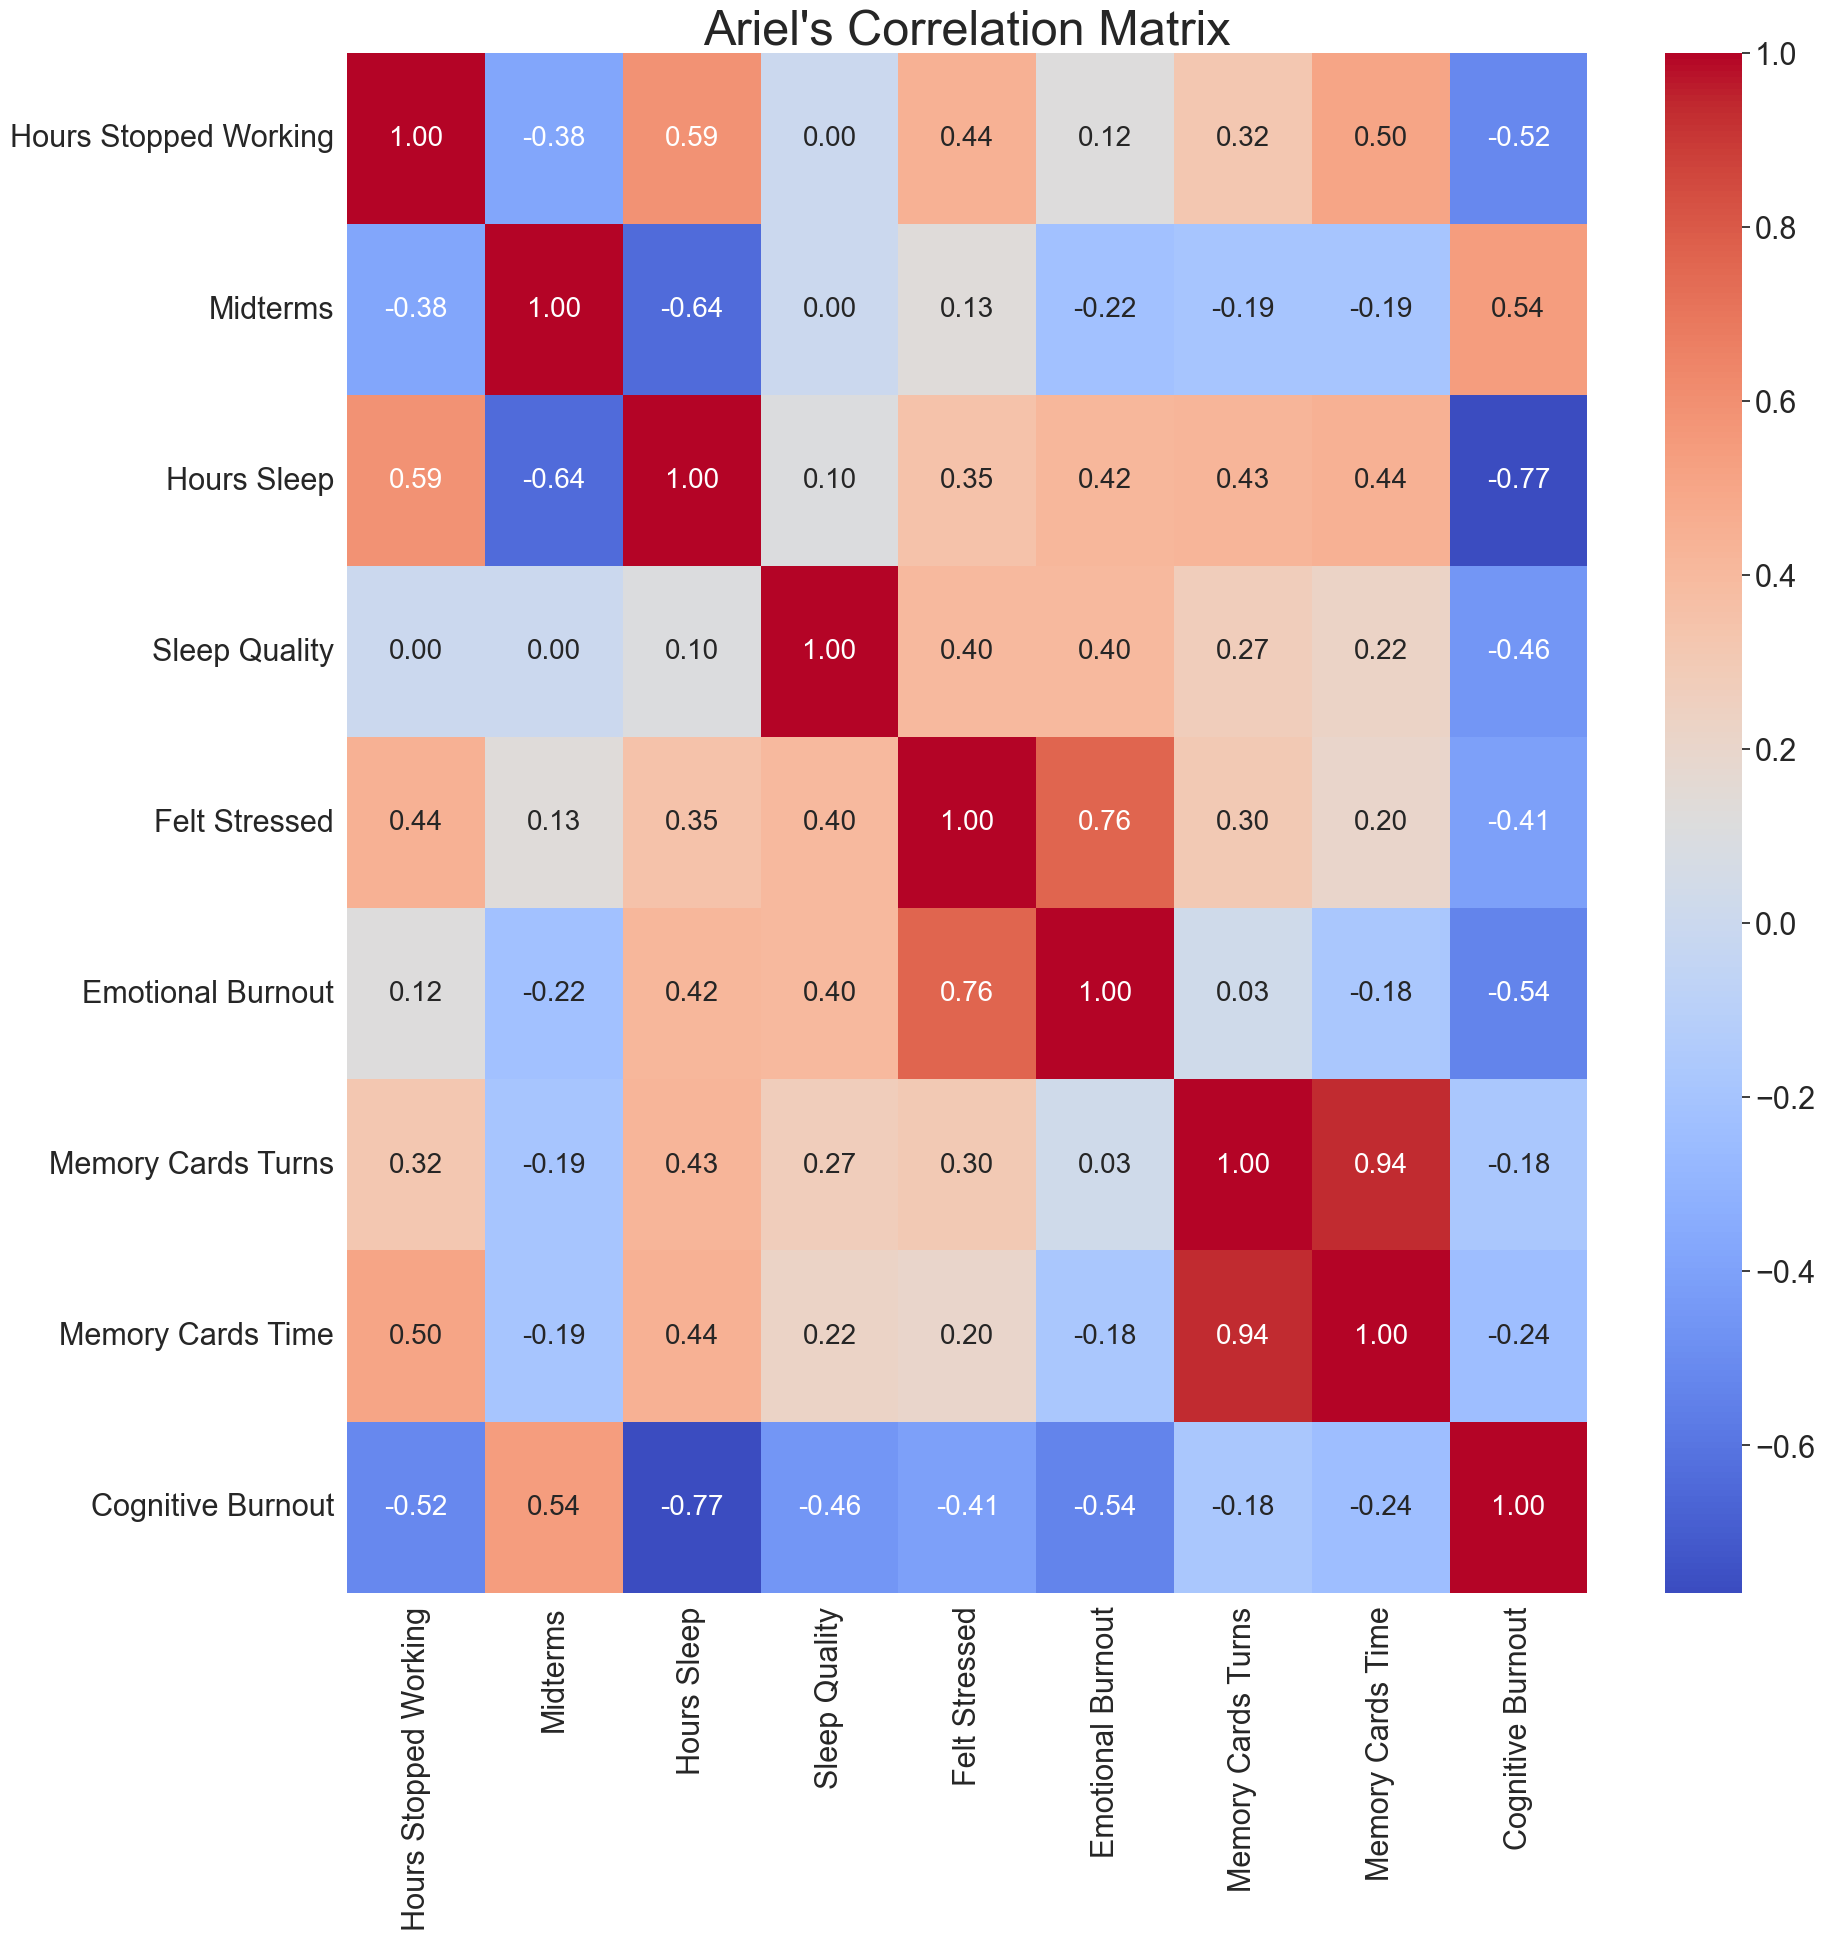

In [22]:
# Plot the correlation matrix
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_ariel, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'size': 20})
# Add title to the plot
plt.title('Ariel\'s Correlation Matrix', fontsize=35)


Text(0.5, 1.0, "Banghua's Correlation Matrix")

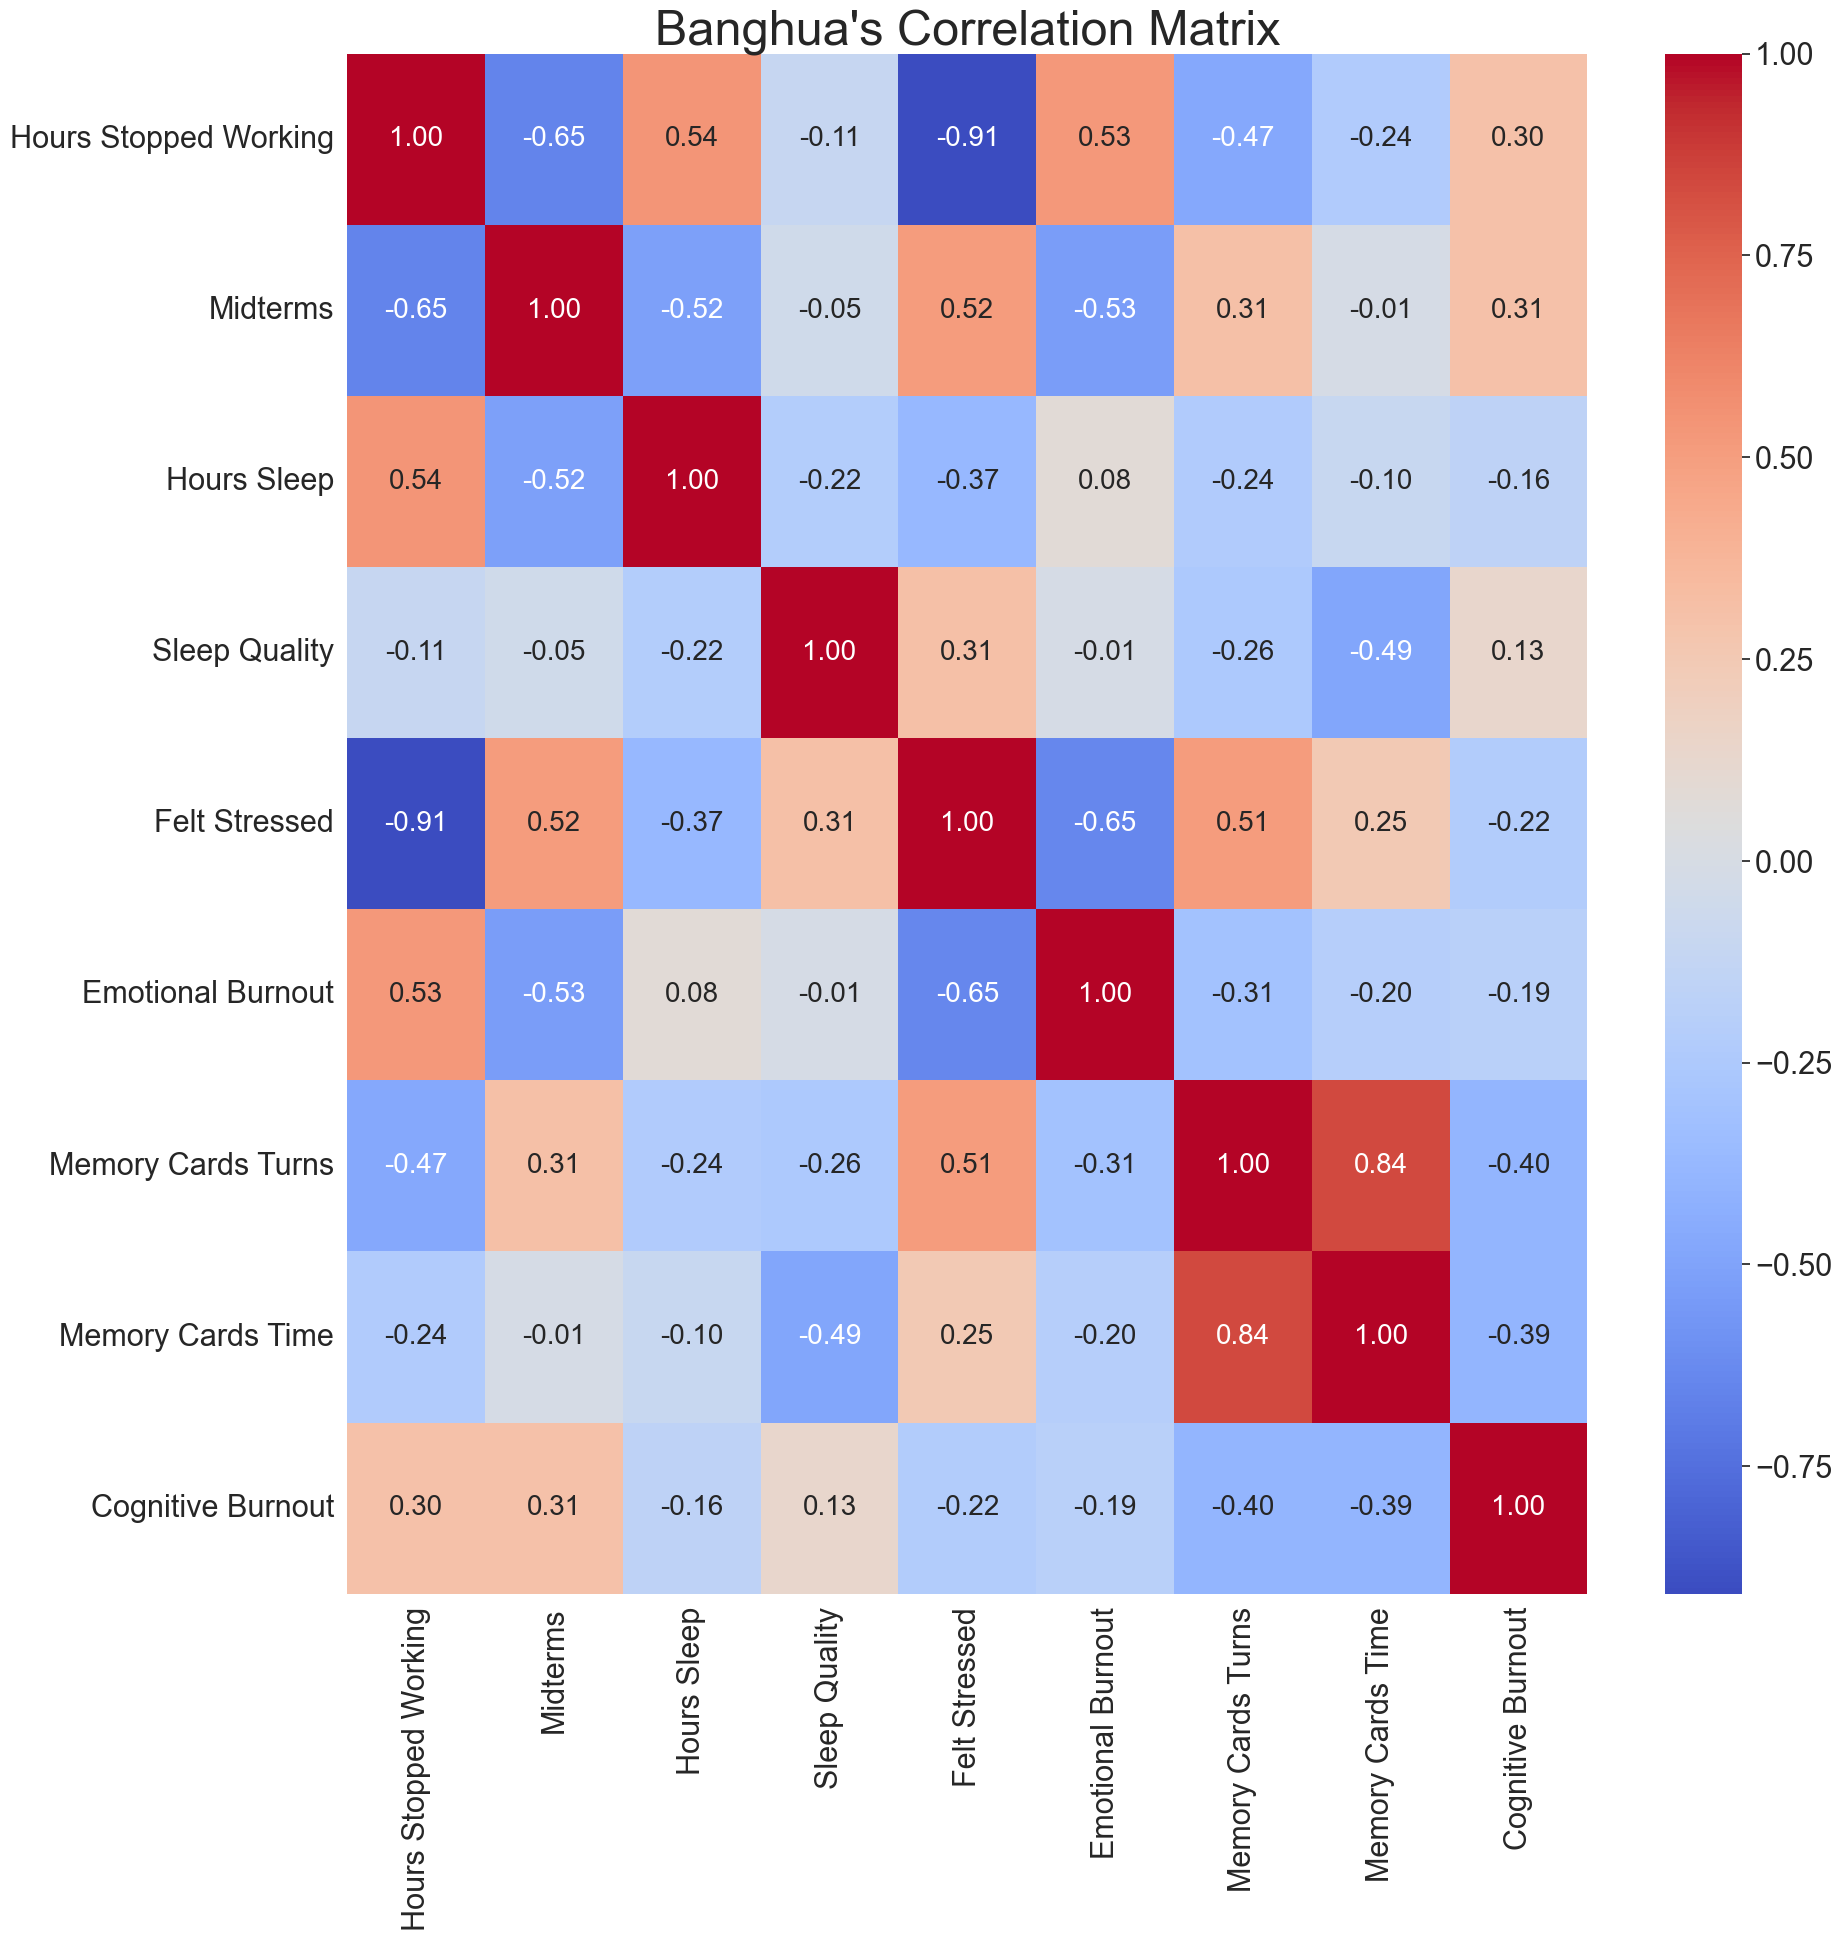

In [23]:
# Plot the correlation matrix for Banghua with title
plt.figure(figsize=(20, 20))
sns.heatmap(corr_banghua, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'size': 20})
# Add title to the plot
plt.title('Banghua\'s Correlation Matrix', fontsize=35)

In [159]:
# Fit a linear regression model for Ariel, where the dependent variable is 'Sleep Quality' and the independent variables are 'Hours Stopped Working', 'Midterms', 'Hours Sleep', 'Felt Stressed', 'Emotional Burnout', 'Memory Cards Turns', 'Memory Cards Time', 'Cognitive Burnout'
# Using sklearn
from sklearn.linear_model import LinearRegression
ariel_model = LinearRegression()
ariel_model.fit(ariel_comparision[['Hours Stopped Working', 'Midterms', 'Hours Sleep', 'Felt Stressed', 'Emotional Burnout', 'Memory Cards Turns', 'Memory Cards Time', 'Cognitive Burnout']], ariel_comparision['Sleep Quality'])
# Check the variance explained by the model
print('ariel: ', ariel_model.score(ariel_comparision[['Hours Stopped Working', 'Midterms', 'Hours Sleep', 'Felt Stressed', 'Emotional Burnout', 'Memory Cards Turns', 'Memory Cards Time', 'Cognitive Burnout']], ariel_comparision['Sleep Quality']))
ariel_coef = ariel_model.coef_

# Banghua
banghua_model = LinearRegression()
banghua_model.fit(banghua_comparison[['Hours Stopped Working', 'Midterms', 'Hours Sleep', 'Felt Stressed', 'Emotional Burnout', 'Memory Cards Turns', 'Memory Cards Time', 'Cognitive Burnout']], banghua_comparison['Sleep Quality'])
print('banghua: ', banghua_model.score(banghua_comparison[['Hours Stopped Working', 'Midterms', 'Hours Sleep', 'Felt Stressed', 'Emotional Burnout', 'Memory Cards Turns', 'Memory Cards Time', 'Cognitive Burnout']], banghua_comparison['Sleep Quality']))
banghua_coef = banghua_model.coef_

ariel:  1.0
banghua:  1.0


Text(0.5, 1.0, "Ariel and Banghua's Coefficients")

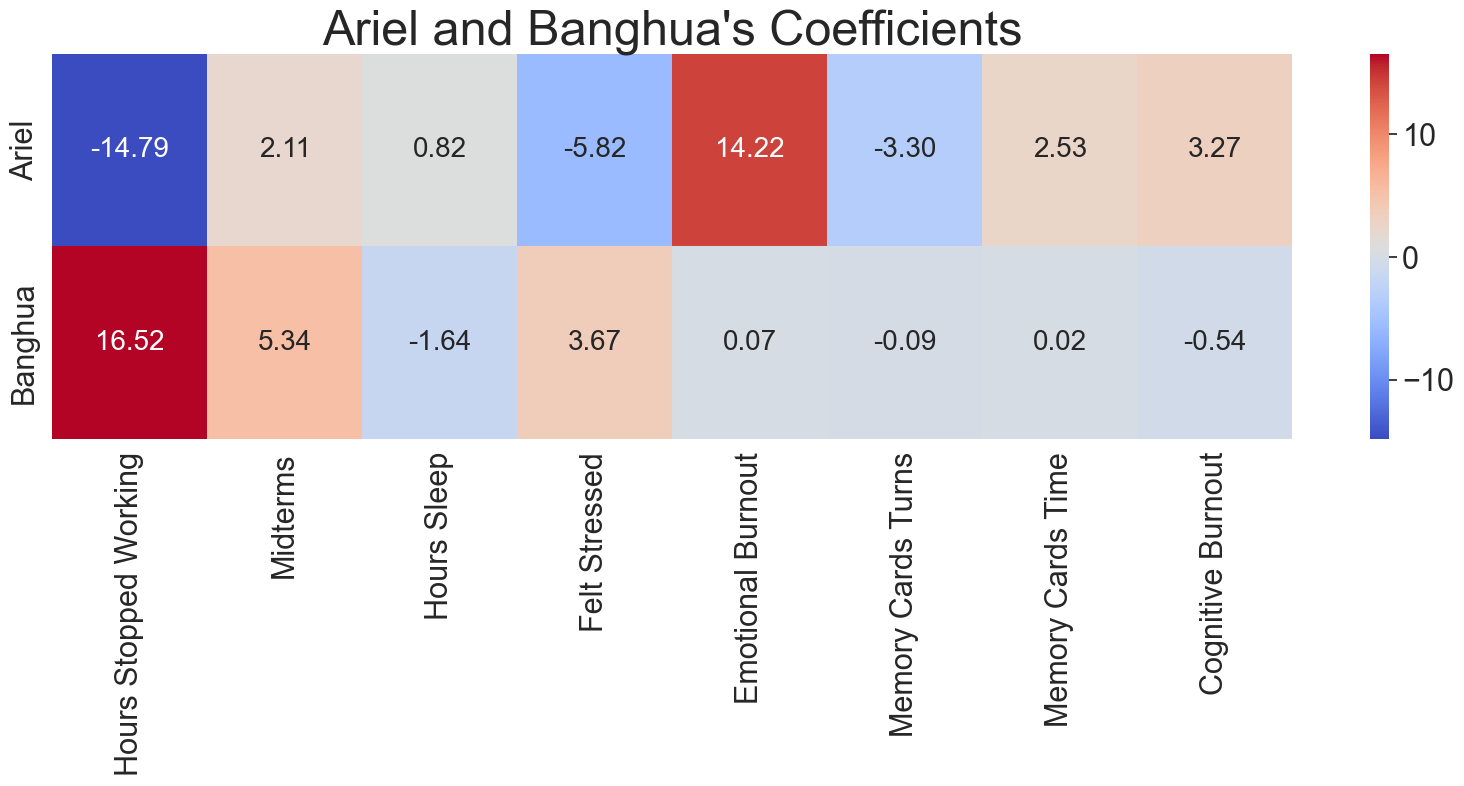

In [168]:
# plot both Ariel and Banghua's coefficients through heatmap
# y labels are ariel and banghua
# x labels are the independent variables
plt.figure(figsize=(20, 5))
sns.heatmap([ariel_coef, banghua_coef], annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'size': 20}, yticklabels=['Ariel', 'Banghua'], xticklabels=['Hours Stopped Working', 'Midterms', 'Hours Sleep', 'Felt Stressed', 'Emotional Burnout', 'Memory Cards Turns', 'Memory Cards Time', 'Cognitive Burnout'])
# Add title to the plot
plt.title('Ariel and Banghua\'s Coefficients', fontsize=35)



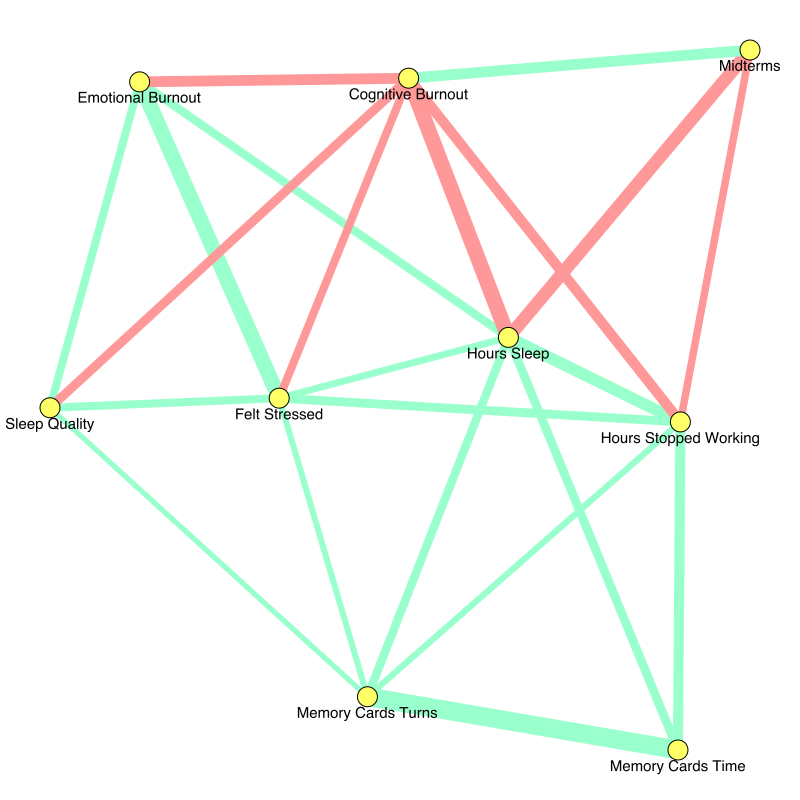

In [31]:
# Create an empty graph for ariel
g_ariel = igraph.Graph()
# Add the columns names as nodes
g_ariel.add_vertices(corr_ariel.columns)
# Add the labels for the nodes
# Add the edges
edge_width = []
for i in range(len(corr_ariel)):
    for j in range(i):
        if abs(corr_ariel.iloc[i, j]) > 0.25 and i != j:
            g_ariel.add_edge(corr_ariel.columns[i], corr_ariel.columns[j])
            edge_width.append(corr_ariel.iloc[i, j])
g_ariel.vs["color"] = "#FFFF66"
g_ariel.vs["label_size"] = 15
# Plot and save the graph
# igraph.plot(g_ariel, bbox=(0, 0, 800, 800), vertex_shape='circle',
# vertex_label=g_ariel.vs["name"], vertex_label_dist=1,
# edge_width=[abs(i*20) for i in edge_width], 
# edge_color=['#FF9999' if i < 0 else "#99FFCC" for i in edge_width],
# margin=50)
igraph.plot(g_ariel, bbox=(0, 0, 800, 800), vertex_shape='circle',
vertex_label=g_ariel.vs["name"], vertex_label_dist=1,
edge_width=[abs(i*20) for i in edge_width],
edge_color=['#FF9999' if i < 0 else "#99FFCC" for i in edge_width],
margin=50, target='ariel.svg')


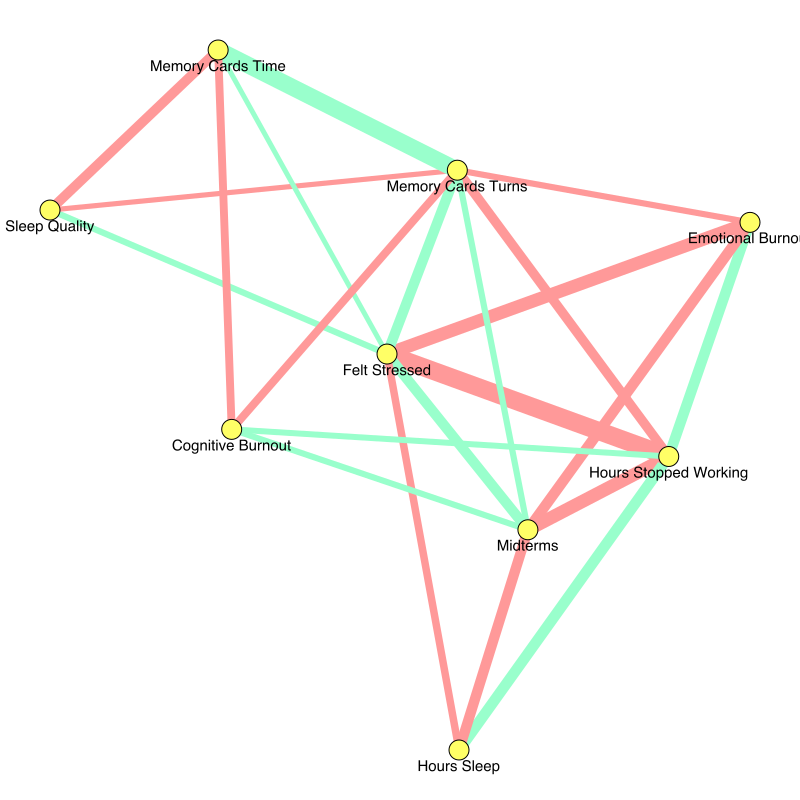

In [34]:
# Create an empty graph for ariel
g_banghua = igraph.Graph()
# Add the columns names as nodes
g_banghua.add_vertices(corr_banghua.columns)
# Add the labels for the nodes
# Add the edges
edge_width = []
for i in range(len(corr_banghua)):
    for j in range(i):
        if abs(corr_banghua.iloc[i, j]) > 0.25 and i != j:
            g_banghua.add_edge(corr_banghua.columns[i], corr_banghua.columns[j])
            edge_width.append(corr_banghua.iloc[i, j])
g_banghua.vs["color"] = "#FFFF66"
g_banghua.vs["label_size"] = 15
# Plot the graph
igraph.plot(g_banghua, bbox=(0, 0, 800, 800), vertex_shape='circle',
vertex_label=g_banghua.vs["name"], vertex_label_dist=1,
edge_width=[abs(i*20) for i in edge_width], 
edge_color=['#FF9999' if i < 0 else "#99FFCC" for i in edge_width],
margin=50, target='banghua.svg')